In [1]:
#importing required libraries
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
#viewing the dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#finding the shape of the data
data.shape

(729322, 11)

In [5]:
#printing all the columns
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
#finding missing values
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Variable identification 

In [7]:
#variable identification
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
#integer data types
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [9]:
#float data types
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [10]:
#object data types
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [11]:
#converting string data type to datetime
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)


#coverting yes/no flag to 0 and 1
data['store_and_fwd_flag'] = 1* (data.store_and_fwd_flag == 'Y')

data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = data[np.abs(data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

In [12]:
#again reading the data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0


In [13]:
#variable identification
data.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag              int32
trip_duration                   int64
check_trip_duration           float64
dtype: object

# Univariate Analysis

In [14]:
#aggregating integer data types into group
numeric_data = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

In [15]:
#Univariate visualization for numeric variables
def UVA_numeric(data, var_group):
    
    size = len(var_group)
    plt.figure(figsize = (20,6), dpi = 100)
    
    for j, i in enumerate(var_group):
        
        #plotting
        plt.subplot(1, size, j+1)
        sns.countplot(data[i])
        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.ylabel('frequency')
        

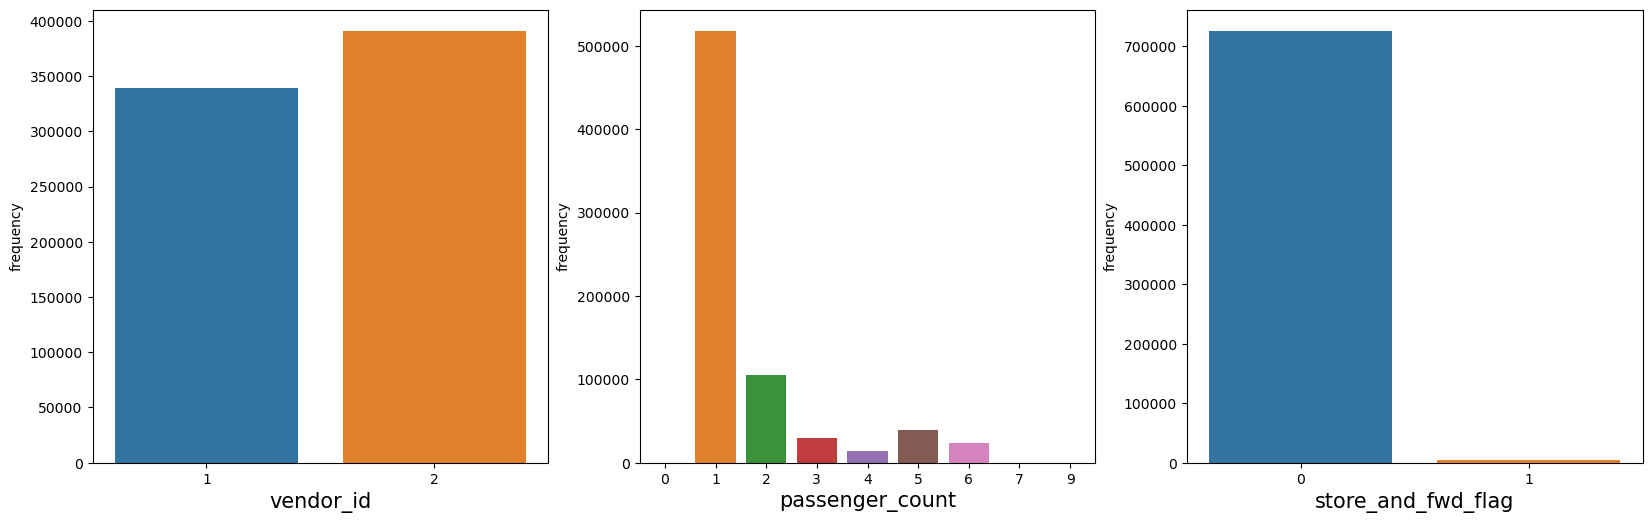

In [16]:
UVA_numeric(data, numeric_data)

Observations:

1. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
2. Vendor 2 has more number of trips as compared to vendor 1.
3. The store_and_fwd_flag values, indicating whether the trip data was sent immediately to the vendor (“0”) or 
held in the memory of the taxi because there was no connection to the server (“1”), 
show that there was almost no storing taking place.

Now, we look into datetime features

In [17]:
data.dtypes[data.dtypes == 'datetime64[ns]']

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

In [18]:
#max/min values of pickup_datetime
data['pickup_datetime'].min(), data['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

Now we extract new columns weekdays and hour of day from pickup_datetime 

In [19]:
#extracting new columns
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [20]:
#viewing new columns
data[['pickup_datetime', 'day_of_week', 'hour_of_day']]

,pickup_datetime,day_of_week,hour_of_day
0,2016-02-29 16:40:21,0,16
1,2016-03-11 23:35:37,4,23
2,2016-02-21 17:59:33,6,17
3,2016-01-05 09:44:31,1,9
4,2016-02-17 06:42:23,2,6
...,...,...,...
729317,2016-05-21 13:29:38,5,13
729318,2016-02-22 00:43:11,0,0
729319,2016-04-15 18:56:48,4,18
729320,2016-06-19 09:50:47,6,9


In [21]:
#aggregating weekdays and hours into group
pickup_datetime = ['day_of_week', 'hour_of_day']

In [22]:
#Univariate visualization 
def UVA_pickup_datetime(data, var_group):
    
    size = len(var_group)
    plt.figure(figsize = (22, 6))
    
    for j, i in enumerate(var_group):
        
        plt.subplot(1, size, j+1)
        sns.countplot(data[i])
        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.ylabel('total number of pickups', fontsize = 15)

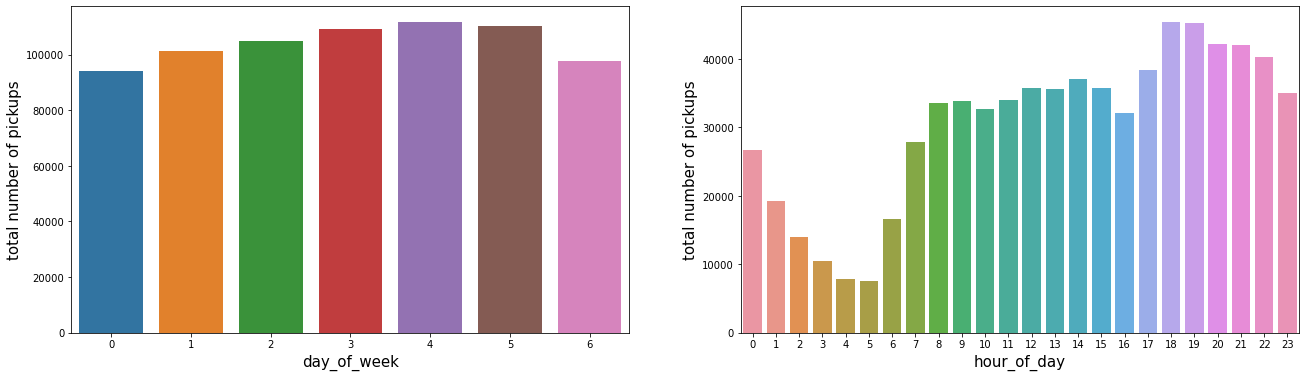

In [23]:
UVA_pickup_datetime(data, pickup_datetime)

1. Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.

2. Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.

next in our dataset is latitude&longitude

# Latitude & Longitude

In [24]:
#data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]

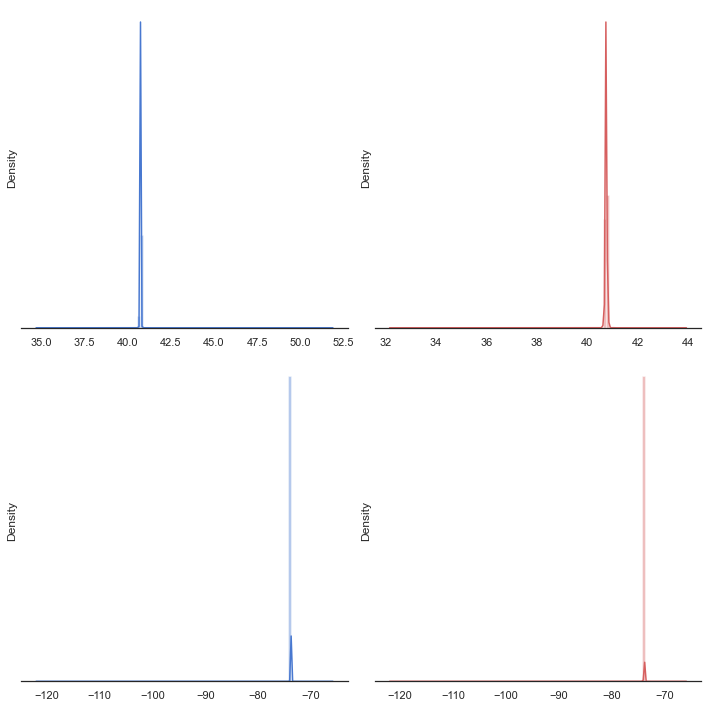

In [25]:
sns.set(style = "white", palette = "muted", color_codes = True)
f, axes = plt.subplots(2, 2, figsize = (10, 10), sharex = False, sharey = False)
sns.despine(left = True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude', color = 'b', bins = 100, ax = axes[0, 0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude', color = 'r', bins = 100, ax = axes[0, 1])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude', color = 'b', bins = 100, ax = axes[1, 0])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude', color = 'r', bins = 100, ax = axes[1, 1])
plt.setp(axes, yticks =[])
plt.tight_layout()
plt.show()

Findings - (Here, red represents pickup and dropoff Longitudes & blue represents pickup & dropoff lattitudes)

 1. From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73.
 2. Some extreme co-ordinates has squeezed the plot such that we see a spike here
 3. A good idea is to remove these outliers and look at the distribution more closely

From the above plot we going to round the values of latitude and longitude to 40 t0 41 and -74 to -73 respectively

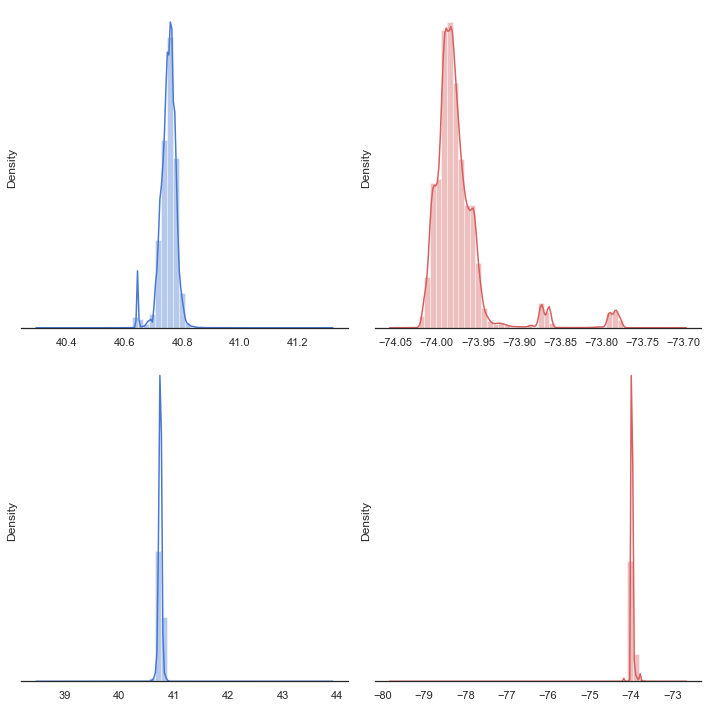

In [26]:
df = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
df = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
df = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
df = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]
data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 50, ax=axes[0,0])
sns.distplot(data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =50, ax=axes[0,1])
sns.distplot(data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =50, ax=axes[1, 0])
sns.distplot(data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =50, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

1. We have a much better view of the distribution of coordinates instead of spikes. And we see that most trips are concentrated between these lat long only with a few significant clusters.
2. These clusters are represented by the numerous peaks in the lattitude and longitude histograms

# Bivariate Analysis

here, no categorical datasets are not present so, we are going to do bivariate analysis with target variable 'trip_duratio'

In [27]:
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

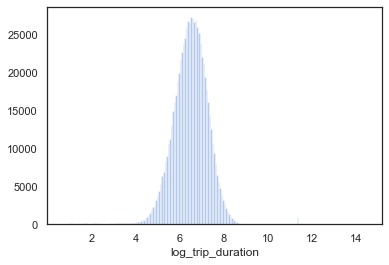

In [28]:
#visualization of trip_duration
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
sns.distplot(data['log_trip_duration'], kde = False, bins = 200)
plt.show()

In [29]:
#coluumns
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'day_of_week', 'hour_of_day',
       'log_trip_duration'],
      dtype='object')

# trip duration vs weekday

# Trip_duration vs vendor id

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration'>

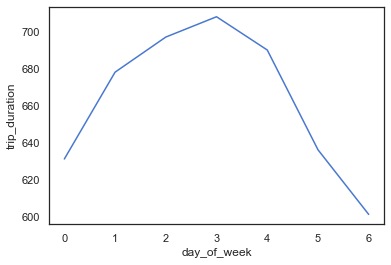

In [42]:
summary_hourly_avg_duration = pd.DataFrame(data.groupby(['day_of_week'])['trip_duration'].median())

sns.lineplot(x = "day_of_week", y = "trip_duration" ,data = summary_hourly_avg_duration)

<AxesSubplot:xlabel='hour_of_day', ylabel='trip_duration'>

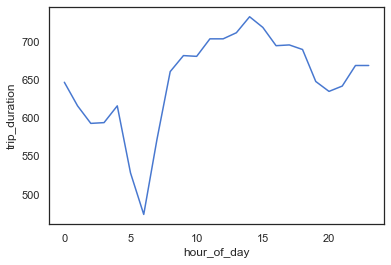

In [43]:
summary_hourly_avg_duration = pd.DataFrame(data.groupby(['hour_of_day'])['trip_duration'].median())

sns.lineplot(x = "hour_of_day", y = "trip_duration" ,data = summary_hourly_avg_duration)

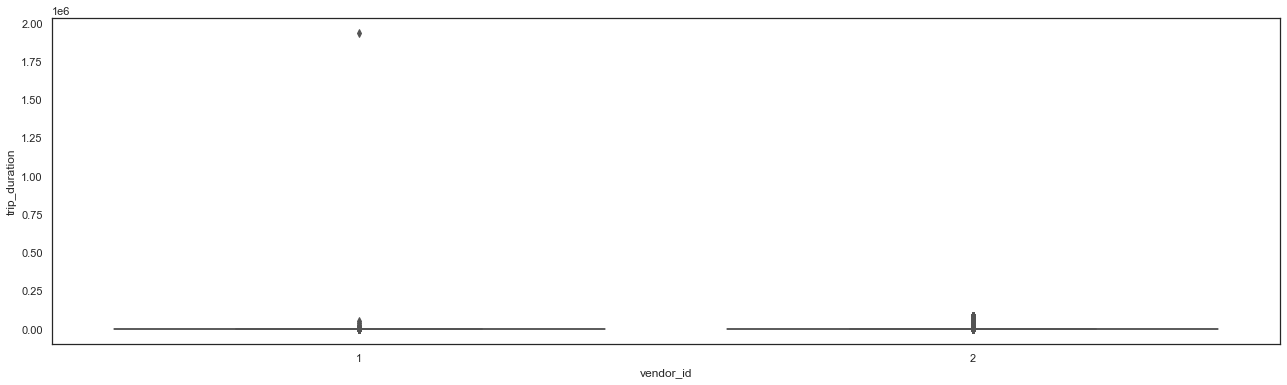

In [30]:
plt.figure(figsize=(22, 6))
sns.boxplot(x="vendor_id", y="trip_duration", data=data)
plt.show()

There are number of outliers present. 

There could be 2 solutions to this:

Remove the huge outliers and plot again
1. Look at median trip duration for both vendors on hourly basis
2. Let's try the first technique now and check trips below 50000 seconds only

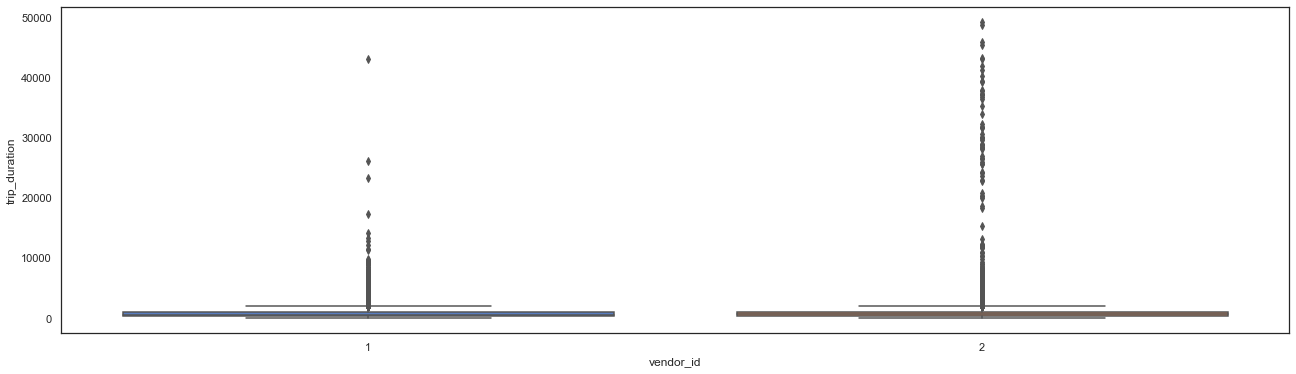

In [31]:
plt.figure(figsize=(22, 6))
data_sub = data[data['trip_duration'] < 50000]
sns.boxplot(x="vendor_id", y="trip_duration", data=data_sub)
plt.show()

# mean trip_duration vendorwise

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration'>

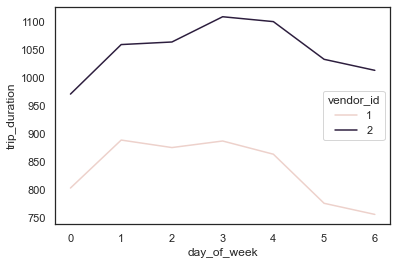

In [45]:
summary_wdays_avg_duration = pd.DataFrame(data.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
sns.lineplot(x = 'day_of_week', y = 'trip_duration', hue = 'vendor_id', data = summary_wdays_avg_duration)

# Median trip duration vendorwise

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration'>

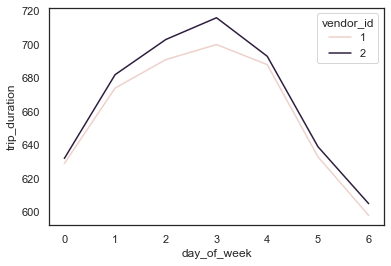

In [46]:
summary_wdays_avg_duration = pd.DataFrame(data.groupby(['vendor_id','day_of_week'])['trip_duration'].median())
sns.lineplot(x = 'day_of_week', y = 'trip_duration', hue = 'vendor_id', data = summary_wdays_avg_duration)

Median trip duration does not vary much as can be seen from the above plot for different vendors. It emphasises the importance of looking at the correct measure for central tendency for analysis.

# Trip duration vs passanger count

In [50]:
data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

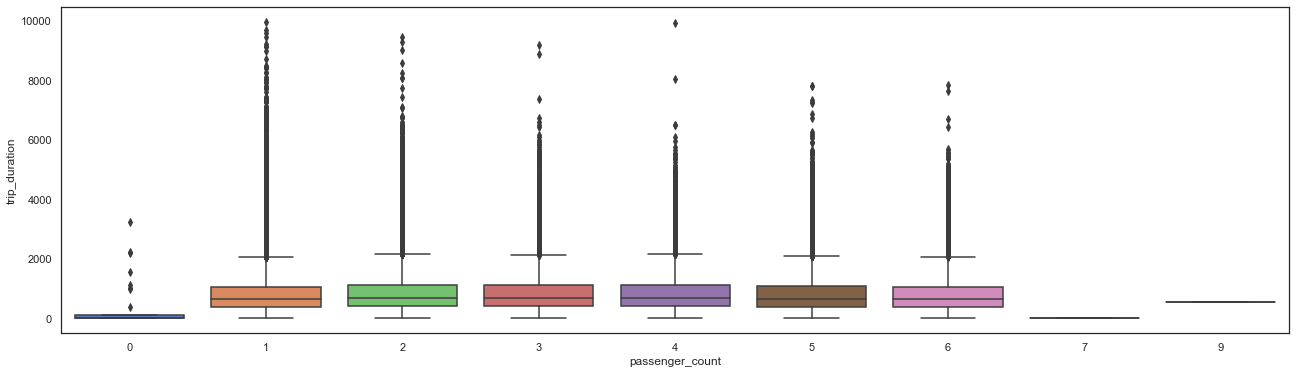

In [51]:
data.passenger_count.value_counts()
plt.figure(figsize=(22, 6))
df_sub = data[data['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=df_sub)
plt.show()


1. The boxplot clearly shows that there not much of a difference in distribution for the most frequently occuring passenger count values - 1, 2, 3.
2. Another key observation is that the number of outliers are reduced for higher passenger counts but that only comes down to the individual frequencies of each passenger count.

# Visualize the most frequently occuring pickup points on latitude-longitude map

In [82]:
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
data_new['pick_lat_new'] = list(map(int, (data_new['pickup_latitude'] - (40.6000))*10000))
data_new['drop_lat_new'] = list(map(int, (data_new['dropoff_latitude'] - (40.6000))*10000))
data_new['pick_lon_new'] = list(map(int, (data_new['pickup_longitude'] - (-74.050))*10000))
data_new['drop_lon_new'] = list(map(int, (data_new['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(data.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//25) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 255
        elif (a//10)>0:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 255
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 255
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 

IndexError: index -58877 is out of bounds for axis 0 with size 3000

 I don't know how to clear this error.

## Correlation Heatmap

Let us quickly look at the correlation heatmap to check the correlations amongst all features

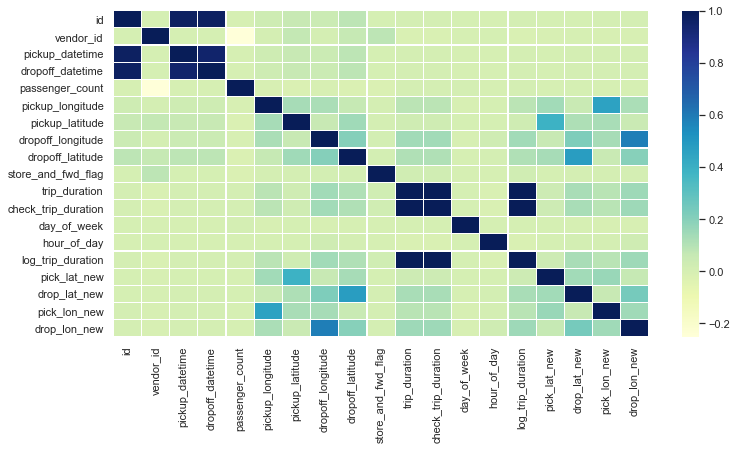

In [84]:
plt.figure(figsize=(12, 6))
df = data.drop(['id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count','check_trip_duration',],
        axis=1)
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")